This created by:

Arsy Arlina

arsyarlina96@gmail.com

+62812-8310-9181

# Several Packages to Load

In [1]:
#Several packages to load
import pandas as pd, matplotlib.pyplot as plt, numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Run Data from Github

In [2]:
# You can Run data without download file
try:
    # Running Locally 
    df = pd.read_csv('data/Hotel_Reservations.csv')
except:
    # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/aciarlina14/eda/main/Hotel_Reservations.csv
    df = pd.read_csv('data/Hotel_Reservations.csv')

# 1. Data Exploration

In [3]:
#checking the shape ( rows and column numbers)
print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 36275 rows and 19 columns.


In [4]:
# Checking random sampling rows of data
df.sample(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
7003,INN07004,1,0,0,1,Meal Plan 1,0,Room_Type 1,84,2018,9,7,Corporate,1,3,14,65.00,0,Not_Canceled
15783,INN15784,2,0,2,5,Meal Plan 1,0,Room_Type 4,176,2018,8,8,Online,0,0,0,112.20,1,Canceled
6719,INN06720,2,0,0,3,Meal Plan 1,0,Room_Type 1,9,2018,4,27,Online,0,0,0,131.00,1,Not_Canceled
17686,INN17687,1,1,2,4,Meal Plan 1,0,Room_Type 1,22,2018,2,13,Online,0,0,0,91.00,0,Not_Canceled
30415,INN30416,2,0,1,1,Meal Plan 1,0,Room_Type 1,3,2018,8,13,Online,0,0,0,207.00,0,Canceled
6276,INN06277,2,0,0,3,Meal Plan 1,0,Room_Type 1,41,2018,3,10,Online,0,0,0,83.90,1,Not_Canceled
2457,INN02458,1,0,0,1,Meal Plan 1,0,Room_Type 1,12,2017,11,25,Corporate,1,0,1,65.00,0,Not_Canceled
25357,INN25358,2,0,2,3,Meal Plan 1,0,Room_Type 4,59,2018,9,2,Online,0,0,0,120.96,1,Canceled
5554,INN05555,2,0,0,3,Meal Plan 1,0,Room_Type 1,19,2017,10,6,Offline,1,1,0,90.00,0,Not_Canceled
4732,INN04733,2,0,0,1,Not Selected,0,Room_Type 1,0,2018,6,1,Online,0,0,0,116.10,1,Not_Canceled


In [5]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
#looking at the min, max values,mean values etc. NAN values for mean,25% ,50%,75%,max indicates those are categorical columns.
df.describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


Booking_ID value shows indexing data and too variate, so this variable is no needed to the next analysis. Lets drop this variable.

In [7]:
#We remove column booking_id without making new dataframe
df.drop('Booking_ID',axis=1,inplace=True)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [8]:
# Looking for data types non null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [9]:
print(f' Now we have total {df.shape[0]} rows and {df.shape[1]} columns.')

 Now we have total 36275 rows and 18 columns.


### Data Cleaning

 We have total 10275 duplicates.
AxesSubplot(0.125,0.125;0.775x0.755)


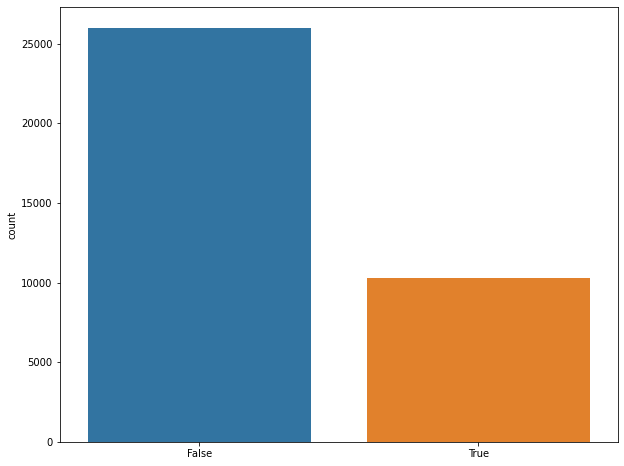

In [10]:
# checking for the duplicate rows
print(f' We have total {df.duplicated().sum()} duplicates.')
# Visulizing through Count pot
plt.figure(figsize=(10,8))
print(sns.countplot(x=df.duplicated()))

So we have 0 duplicate rows in our data.

                                 Columns  Null values
0                           no_of_adults            0
1                         no_of_children            0
2                 no_of_special_requests            0
3                     avg_price_per_room            0
4   no_of_previous_bookings_not_canceled            0
5           no_of_previous_cancellations            0
6                         repeated_guest            0
7                    market_segment_type            0
8                           arrival_date            0
9                          arrival_month            0
10                          arrival_year            0
11                             lead_time            0
12                    room_type_reserved            0
13            required_car_parking_space            0
14                     type_of_meal_plan            0
15                     no_of_week_nights            0
16                  no_of_weekend_nights            0
17                        bo

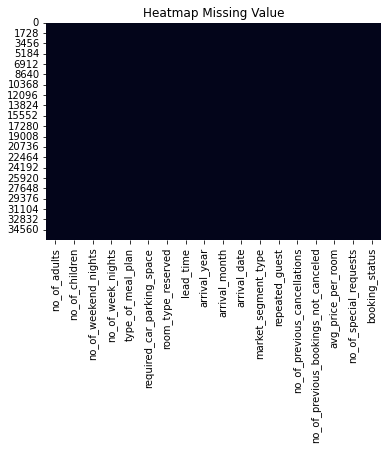

None


In [11]:
#checking for Null Values
print(df.isna().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'Columns',0:'Null values'}))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
print(plt.show())

So we don't have Null values in our data.

In [12]:
# Checking number of categories data for all variable
df.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
arrival_year                               2
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
booking_status                             2
dtype: int64

In [13]:
# Checking the unique values in categorical columns.
categorical_cols=list(set(df)-set(df.describe()))

for col in categorical_cols:
  print(f'Unique values in column {col} are: {(df[col].unique())}')

Unique values in column market_segment_type are: ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
Unique values in column booking_status are: ['Not_Canceled' 'Canceled']
Unique values in column room_type_reserved are: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
Unique values in column type_of_meal_plan are: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']


In [14]:
# lets add some new columns

df['total_people'] = df['no_of_adults'] + df['no_of_children']   
df['total_stay'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
print(f' Now we have total {df.shape[0]} rows and {df.shape[1]} columns.')   

 Now we have total 36275 rows and 20 columns.


##Exploratory Data Analysis (EDA)

**1) What is the pecentage of cancellation?**

Text(0.5, 1.0, 'Cancellation and non Cancellation')

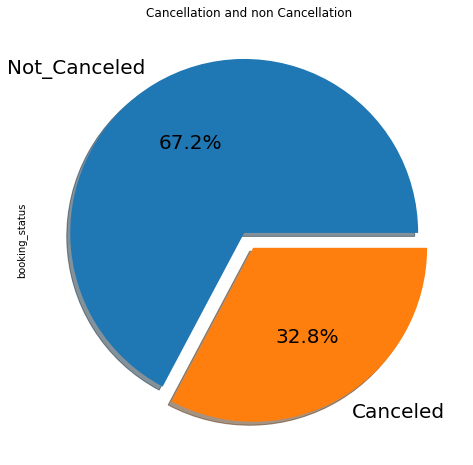

In [15]:
# Visualizing by pie chart.
df['booking_status'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   
plt.title('Cancellation and non Cancellation')

32.8 % of the bookings were cancelled.

**2) Which type of food is mostly preferred by the guests?**

Text(0.5, 1.0, 'Preferred Meal Type')

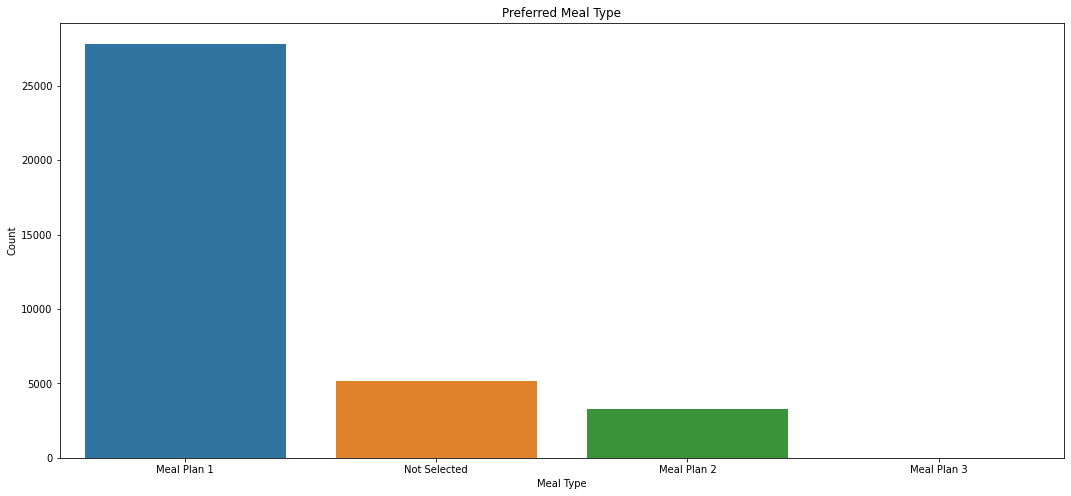

In [16]:
# Visualizing by bar chart.
plt.figure(figsize=(18,8))
sns.countplot(x=df['type_of_meal_plan'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

So the most preferred plan meal type by the guests is Meal Plan 1

**3) What is the percentage distribution of required_car_parking_spaces?**

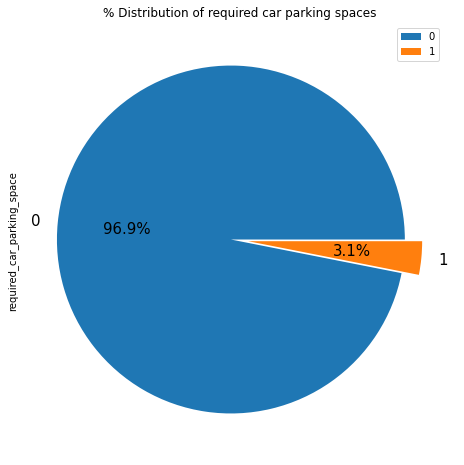

In [17]:
df['required_car_parking_space'].value_counts().plot.pie(explode=[0.05]*2, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15)

labels=df['required_car_parking_space'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

96.9 % guests did not required the parking space. only 3.1 % guests required only 1 parking space.

**4) Which is the most preferred room type by the customers?**

Text(0.5, 1.0, 'Most preferred Room type')

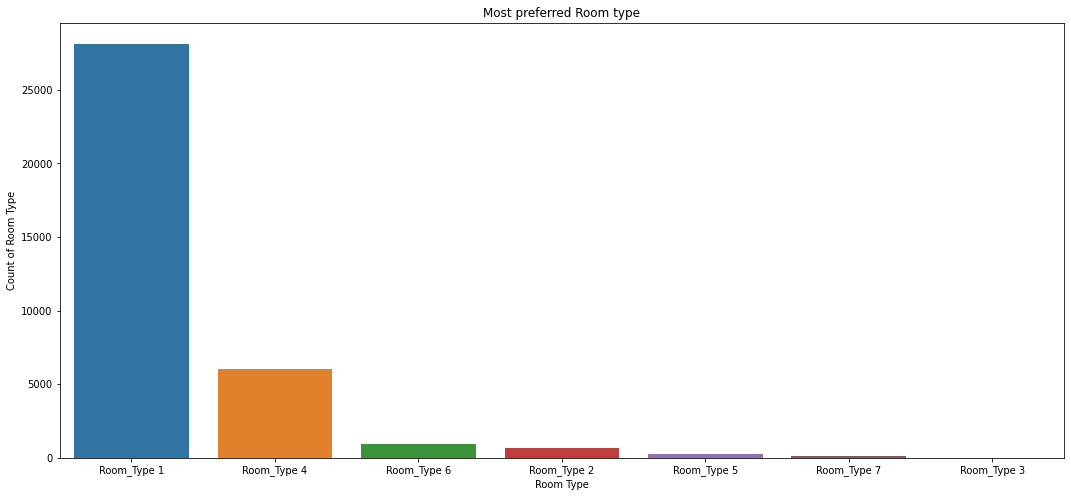

In [18]:
#set plotsize
plt.figure(figsize=(18,8))

#plotting 
sns.countplot(x=df['room_type_reserved'],order=df['room_type_reserved'].value_counts().index)
#  set xlabel for the plot
plt.xlabel('Room Type')
# set y label for the plot
plt.ylabel('Count of Room Type')
#set title for the plot
plt.title("Most preferred Room type")

So the most preferred Room type is "Type 1".

**5) Which year had the highest bookings?**

Text(0.5, 1.0, 'Year Wise Bookings Statu')

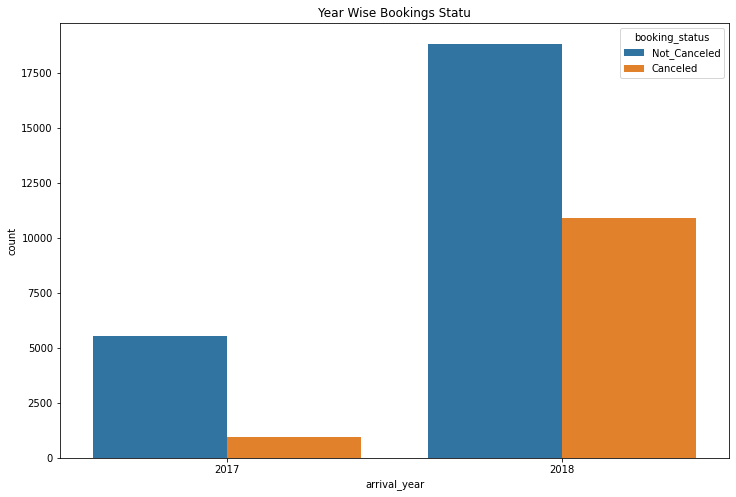

In [19]:
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=df['arrival_year'],hue=df['booking_status'])
plt.title("Year Wise Bookings Statu")

2018 had the higest bookings, but have the higest canceled booking.
2017 had less bookings, but less the cancelation.
overall Cancelled booking most hapanned on 2018.

**6) In which month most of the cancel bookings happened?**

Text(0.5, 1.0, 'Month Wise bookings Status')

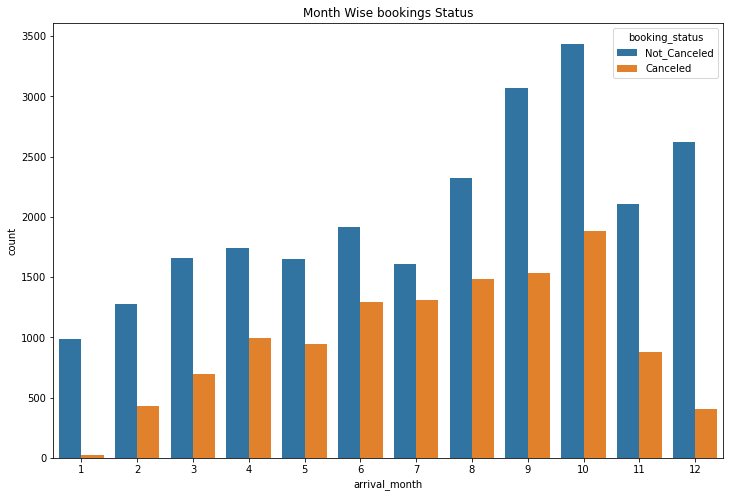

In [20]:
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=df['arrival_month'],hue=df['booking_status'])
plt.title("Month Wise bookings Status")


September (9) and October (10) months had the most booking and Cancel Bookings.

**7)  In which date most of the cancel bookings happened?**

Text(0.5, 1.0, 'Date Wise bookings Status')

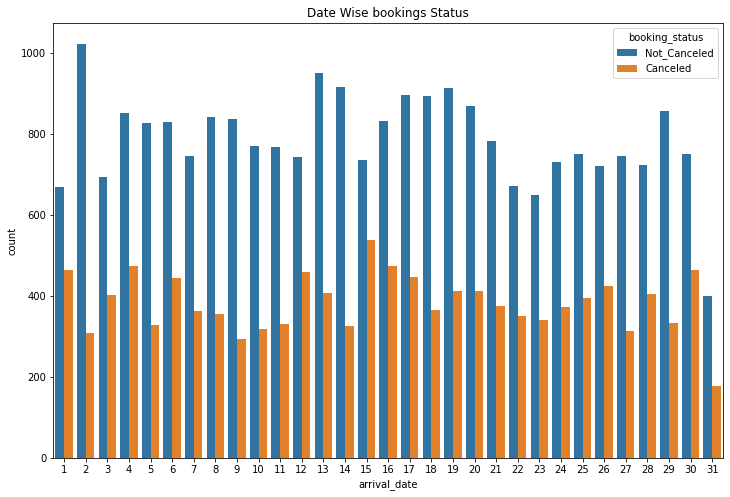

In [21]:
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=df['arrival_date'],hue=df['booking_status'])
plt.title("Date Wise bookings Status")

the graph shows booking canceled has low tren arrival date wise, because nothing date most of the cancel bookings happened, graph has fluctuative.

**8) Which Market Segment Type has the higest cancellation rate**

Text(0.5, 1.0, 'Market Segmen Type Wise bookings Status')

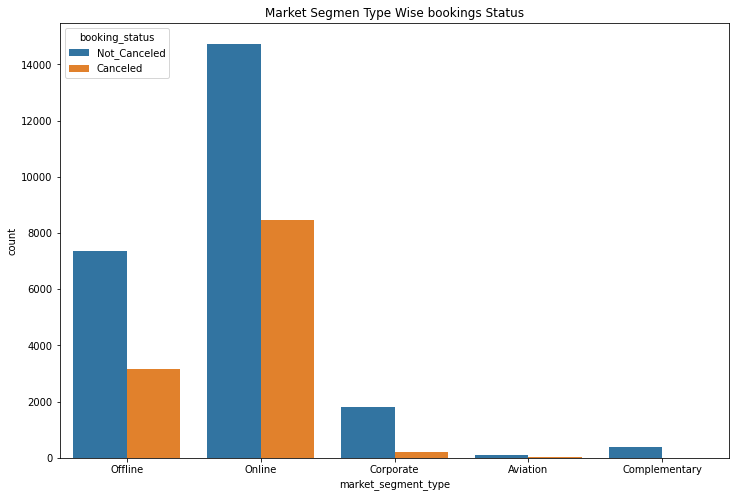

In [22]:
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=df['market_segment_type'],hue=df['booking_status'])
plt.title("Market Segmen Type Wise bookings Status")

Booking by online had the higest booking, but it makes the highest canceled booking. It can happend because this is often made easier by the option to do.

**9) What is the Percentage of repeated guests?**

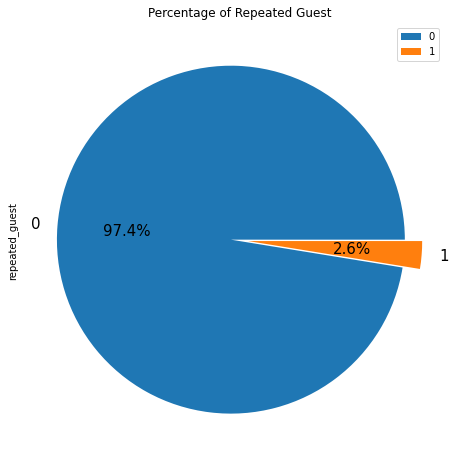

In [23]:
df['repeated_guest'].value_counts().plot.pie(explode=[0.05]*2, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15)

labels=df['repeated_guest'].value_counts().index
plt.title('Percentage of Repeated Guest')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

Repeated guests are very few which only 2.6 %.
In order to retained the guests management should take feedbacks from guests and try to imporve the services.

**10) Which Booking Status has the more lead time?**

Text(0.5, 1.0, 'Average Lead Time for each Booking Status')

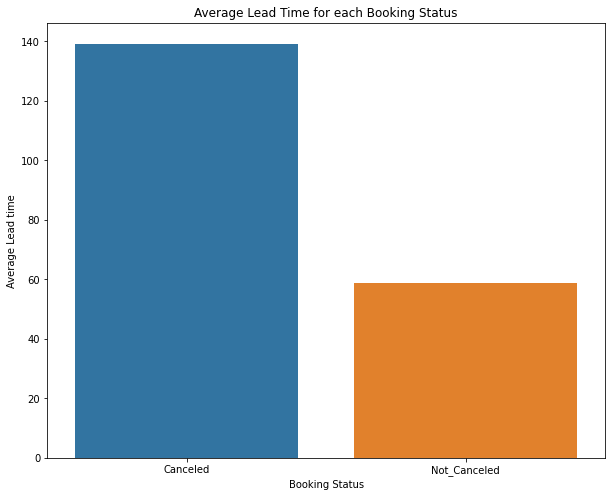

In [24]:
#group by booking status and taking mean of lead time
grup_by_status=df.groupby('booking_status')

avg_lead_time=grup_by_status['lead_time'].mean().reset_index()

#set plot size
plt.figure(figsize=(10,8))

# plot the bar plot
sns.barplot(x=avg_lead_time['booking_status'],y=avg_lead_time['lead_time'])
# set lables
plt.xlabel('Booking Status')
plt.ylabel('Average Lead time')
plt.title("Average Lead Time for each Booking Status")

Canceled booking has slightly high avg lead time. That means customers with early booking liable to cancel their trips.

**11) What is the most visitor in both types booking status ?**

Text(0.5, 1.0, 'Number of Adults Wise bookings Status')

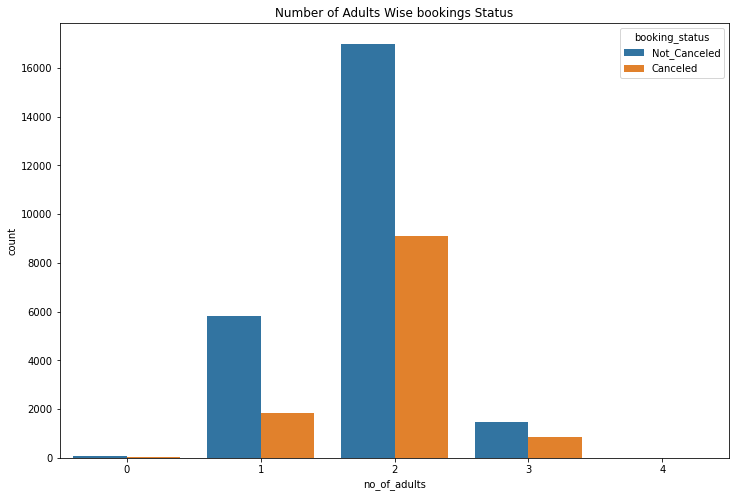

In [25]:
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=df['no_of_adults'],hue=df['booking_status'])
plt.title("Number of Adults Wise bookings Status")

Text(0.5, 1.0, 'Number of Children Wise bookings Status')

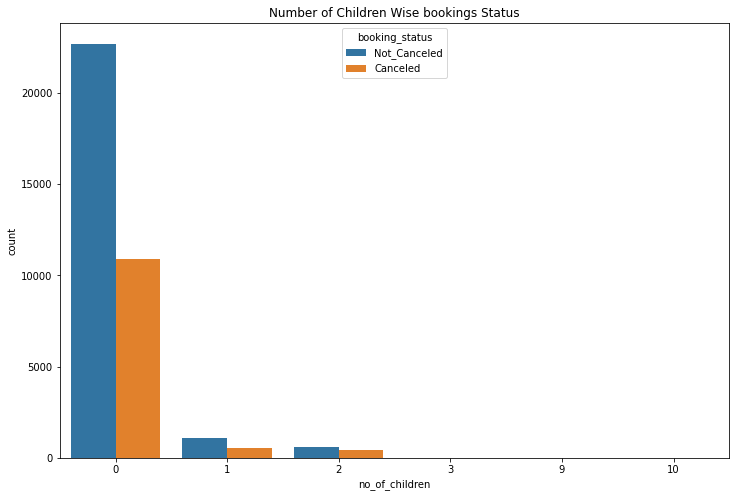

In [26]:
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=df['no_of_children'],hue=df['booking_status'])
plt.title("Number of Children Wise bookings Status")

the most of visitor booking or booking cancel is visitor with no children

## Correlation of The Column

In [27]:
df.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,total_people,total_stay
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401,0.785371,0.133803
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486,0.603365,0.033644
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593,0.100658,0.629339
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994,0.099352,0.877513
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922,0.030318,-0.053704
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645,0.048441,0.140934
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205,0.089663,0.052795
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552,0.015517,0.024703
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352,0.036785,0.005960
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820,-0.175869,-0.111525


Text(0.5, 1.0, 'Co-relation of the columns')

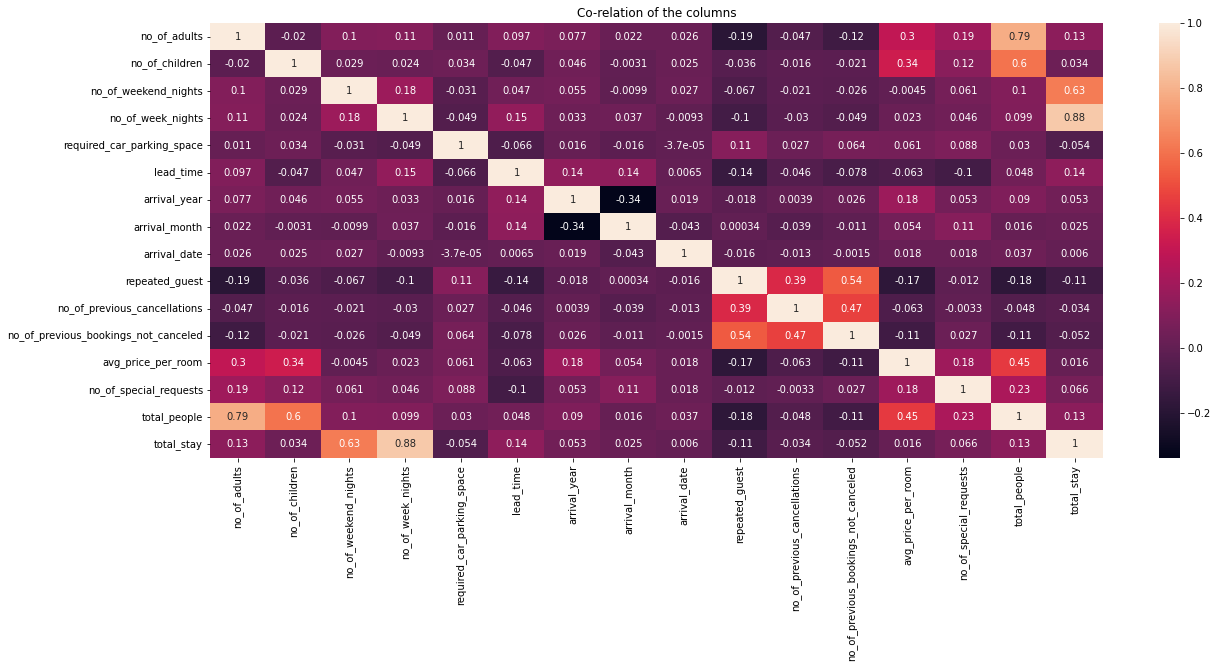

In [28]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Co-relation of the columns')

We can see that:


1.    repeated guest and total stay are negatively corelated. That means the total stay length of the customer does not guarantee that the customer will repeat booking or visit
2.   lead time and total stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.
3. repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are not more likely to cancel their bookings.





# how you will make the visualization without impacting performance?



1. Data Identification
2. Minimize the creation of new variables that are used only temporarily because they can consume memory and execution time. Ex: using inplace in drop column process on data frame: df[a,b,c] -> df =df[a,b]   
3. Data Cleaning



# Model

In [29]:
# categorycal data to numerical data
df['type_of_meal_plan']=pd.factorize(df.type_of_meal_plan)[0]
df['room_type_reserved']=pd.factorize(df.room_type_reserved)[0]
df['market_segment_type']=pd.factorize(df.market_segment_type)[0]
df['booking_status']=pd.factorize(df.booking_status)[0]
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_people,total_stay
0,2,0,1,2,0,0,0,224,2017,10,2,0,0,0,0,65.00,0,0,2,3
1,2,0,2,3,1,0,0,5,2018,11,6,1,0,0,0,106.68,1,0,2,5
2,1,0,2,1,0,0,0,1,2018,2,28,1,0,0,0,60.00,0,1,1,3
3,2,0,0,2,0,0,0,211,2018,5,20,1,0,0,0,100.00,0,1,2,2
4,2,0,1,1,1,0,0,48,2018,4,11,1,0,0,0,94.50,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,1,85,2018,8,3,1,0,0,0,167.80,1,0,3,8
36271,2,0,1,3,0,0,0,228,2018,10,17,1,0,0,0,90.95,2,1,2,4
36272,2,0,2,6,0,0,0,148,2018,7,1,1,0,0,0,98.39,2,0,2,8
36273,2,0,0,3,1,0,0,63,2018,4,21,1,0,0,0,94.50,0,1,2,3


In [30]:
#Create matrix
X= df.values[:,0:19]
Y= df.values[:, 19]

In [31]:
#Preprocessing Data
X= preprocessing.scale(X)
X

array([[ 0.29889263, -0.26147045,  0.2174012 , ..., -0.78813999,
        -0.69806151,  0.07651455],
       [ 0.29889263, -0.26147045,  1.36599262, ...,  0.48376045,
        -0.69806151,  0.07651455],
       [-1.62897546, -0.26147045,  1.36599262, ..., -0.78813999,
         1.43253851, -1.46119479],
       ...,
       [ 0.29889263, -0.26147045,  1.36599262, ...,  1.75566089,
        -0.69806151,  0.07651455],
       [ 0.29889263, -0.26147045, -0.93119021, ..., -0.78813999,
         1.43253851,  0.07651455],
       [ 0.29889263, -0.26147045,  0.2174012 , ..., -0.78813999,
        -0.69806151,  0.07651455]])

In [32]:
# Split data X,Y to train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 100)

In [33]:
#Create model using Random Forest Regression
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
#Checking Accuracy model 
score = rfr.score(X_train,y_train)
score

0.999974137620424

# how you will approach to deploy the model to cloud-based



1.   Doing selection data in cleansing process with the specific time frame only 
2.   Using framework with schedulling and trigerring action

